In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
files=[file for file in os.listdir('Sales_Data')]
for file in files:
    print(file)

Sales_December_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


In [5]:
path='/Users/vaibhav/Downloads/Sales_Data'
combined_data=pd.DataFrame()
for file in files:
    current_df= pd.read_csv(path+'/'+file)
    combined_data=pd.concat([combined_data,current_df])
    
combined_data.shape

(186850, 6)

In [7]:
#converting the file to csv

combined_data.to_csv('Sales_Data/combined_data.csv',index=False)

In [8]:
 combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [9]:
combined_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [12]:
#dropping missing values
combined_data=combined_data.dropna(how='all')
combined_data.shape

(186305, 6)

In [13]:
#best month of sale

def month(x):
    return x.split('/')[0]

In [14]:
combined_data['month']=combined_data['Order Date'].apply(month)

In [15]:
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [17]:
combined_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [18]:
combined_data['month'].unique()

array(['12', 'Order Date', '01', '04', '05', '02', '03', '08', '09', '06',
       '11', '10', '07'], dtype=object)

In [20]:
filter=combined_data['month']=='Order Date'
combined_data=combined_data[~filter]
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [21]:
combined_data['Quantity Ordered']=combined_data['Quantity Ordered'].astype(int)
combined_data['Price Each']=combined_data['Price Each'].astype(float)

<ipython-input-21-b939209fc31b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['Quantity Ordered']=combined_data['Quantity Ordered'].astype(int)
<ipython-input-21-b939209fc31b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['Price Each']=combined_data['Price Each'].astype(float)


In [22]:
combined_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                object
dtype: object

In [23]:
#calculating sale
combined_data['Sales']=combined_data['Quantity Ordered']*combined_data['Price Each']

In [24]:
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [26]:
combined_data.groupby('month')['Sales'].sum()

month
01    1.822257e+06
02    2.202022e+06
03    2.807100e+06
04    3.390670e+06
05    3.152607e+06
06    2.577802e+06
07    2.647776e+06
08    2.244468e+06
09    2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

([<matplotlib.axis.XTick at 0x7f8111f9eeb0>,
 <a list of 12 Text major ticklabel objects>)

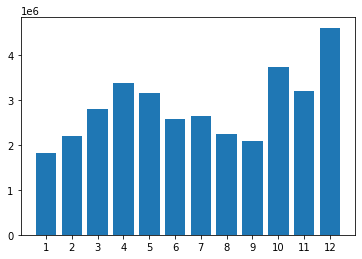

In [33]:
months=range(1,13)
plt.bar(months,combined_data.groupby('month')['Sales'].sum())
plt.xticks(months)

In [34]:
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [35]:
#fetching city from purchase address

def city(x):
    return x.split(',')[1]

In [36]:
combined_data['city']=combined_data['Purchase Address'].apply(city)

In [37]:
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


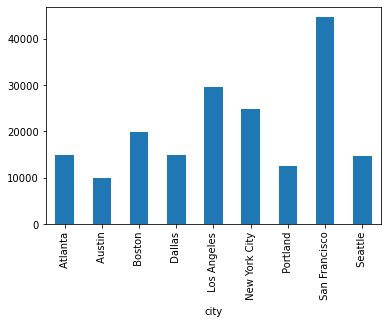

In [39]:
combined_data.groupby('city')['city'].count().plot.bar()

In [40]:
#now fetching hour from order date

combined_data['Order Date'].dtype

dtype('O')

In [41]:
combined_data['Hour']=pd.to_datetime(combined_data['Order Date']).dt.hour

In [42]:
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [43]:
keys=[]
hour=[]
for key,hour_df in combined_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

In [45]:
keys

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [46]:
hour

[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

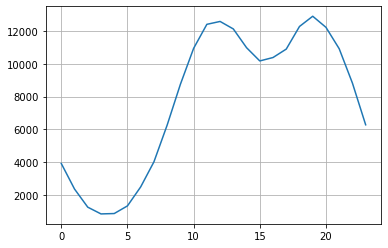

In [48]:
#finding the best time of sales on the basis of hours
plt.grid()
plt.plot(keys,hour)

In [49]:
combined_data.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

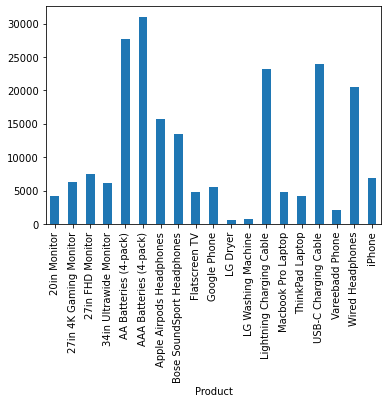

In [53]:
#sales analysis
combined_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [55]:
#from the above graph,we can say that AAA batteries have the maximum sale

combined_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [57]:
products=combined_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=combined_data.groupby('Product')['Quantity Ordered'].sum()
price=combined_data.groupby('Product')['Price Each'].mean()

[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

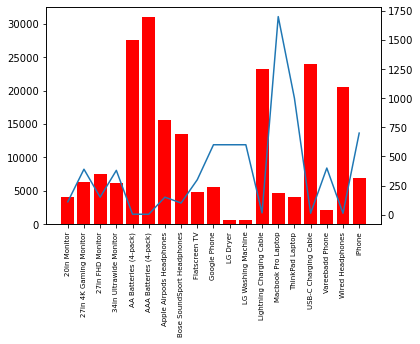

In [63]:
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity,color='r')
ax2.plot(products,price)
ax1.set_xticklabels(products,rotation='vertical',size=7)
#the cheaper the price,hogher the sale

In [64]:
#products most often sold together
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [67]:
df=combined_data['Order ID'].duplicated(keep='first')
df2=combined_data[df]
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12
37,295698,USB-C Charging Cable,2,11.95,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,23.90,New York City,14
43,295703,Bose SoundSport Headphones,1,99.99,12/17/19 12:27,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin,12


In [68]:
df2['Grouped']=df2.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

<ipython-input-68-0652878c0ca5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped']=df2.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [69]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour,Grouped
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12,"USB-C Charging Cable,Bose SoundSport Headphone..."
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12,"USB-C Charging Cable,Bose SoundSport Headphone..."
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12,"USB-C Charging Cable,Bose SoundSport Headphone..."
37,295698,USB-C Charging Cable,2,11.95,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,23.90,New York City,14,USB-C Charging Cable
43,295703,Bose SoundSport Headphones,1,99.99,12/17/19 12:27,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin,12,Bose SoundSport Headphones


In [70]:
df2=df2.drop_duplicates(subset=['Order ID'])
df2.head()

#removing repeated order id

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour,Grouped
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12,"USB-C Charging Cable,Bose SoundSport Headphone..."
37,295698,USB-C Charging Cable,2,11.95,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,23.90,New York City,14,USB-C Charging Cable
43,295703,Bose SoundSport Headphones,1,99.99,12/17/19 12:27,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin,12,Bose SoundSport Headphones
67,295726,Lightning Charging Cable,1,14.95,12/25/19 14:49,"203 Lakeview St, Boston, MA 02215",12,14.95,Boston,14,Lightning Charging Cable
77,295735,Apple Airpods Headphones,1,150.00,12/22/19 18:25,"374 Lincoln St, New York City, NY 10001",12,150.00,New York City,18,"Apple Airpods Headphones,Wired Headphones"


In [71]:
df2['Grouped'].value_counts()

USB-C Charging Cable                                          1546
Lightning Charging Cable                                      1281
Wired Headphones                                              1086
Apple Airpods Headphones                                       560
Bose SoundSport Headphones                                     478
                                                              ... 
Lightning Charging Cable,iPhone                                  1
Lightning Charging Cable,AAA Batteries (4-pack)                  1
Bose SoundSport Headphones,Flatscreen TV                         1
USB-C Charging Cable,Wired Headphones,USB-C Charging Cable       1
Bose SoundSport Headphones,Lightning Charging Cable              1
Name: Grouped, Length: 68, dtype: int64

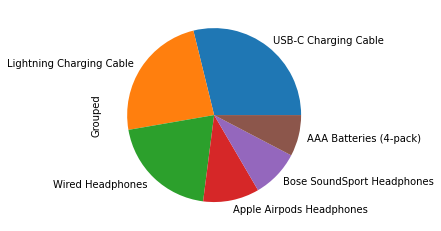

In [72]:
#looking for the top 6 products
df2['Grouped'].value_counts()[0:6].plot.pie()

#the graph shows that when people buy iphone,then there's a high chance of purchasing lightening cables,Airpods,type c cables,etc